In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import random
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
users = pd.read_csv("../dataset/users.csv")
fusers= pd.read_csv("../dataset/fusers.csv")

In [3]:
users['is_fake'] = 0
fusers['is_fake'] = 1

In [4]:
users.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'is_fake'],
      dtype='object')

In [5]:
fusers.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'is_fake'],
      dtype='object')

In [6]:
data = pd.concat([users,fusers],ignore_index=True)

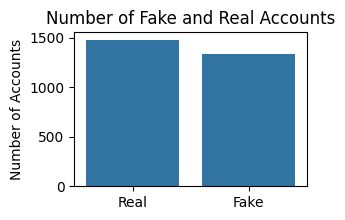

In [7]:
account_counts = data['is_fake'].value_counts()

plt.figure(figsize=(3, 2))
sns.barplot(x=["Real","Fake"], y=account_counts.values)
plt.ylabel('Number of Accounts')
plt.title('Number of Fake and Real Accounts')
plt.show()

In [8]:
columns_to_drop = ['id', 'name', 'screen_name', 'created_at', 'url', 'time_zone', 'profile_image_url', 'profile_banner_url', 'profile_background_image_url_https', 'profile_image_url_https', 'profile_sidebar_border_color', 'profile_background_image_url', 'profile_background_color', 'location','updated','profile_link_color', 'utc_offset', 'dataset','profile_background_tile','profile_text_color','profile_sidebar_border_color','profile_sidebar_fill_color','profile_use_background_image','default_profile_image']
data = data.drop(columns=columns_to_drop)

<Figure size 600x300 with 0 Axes>

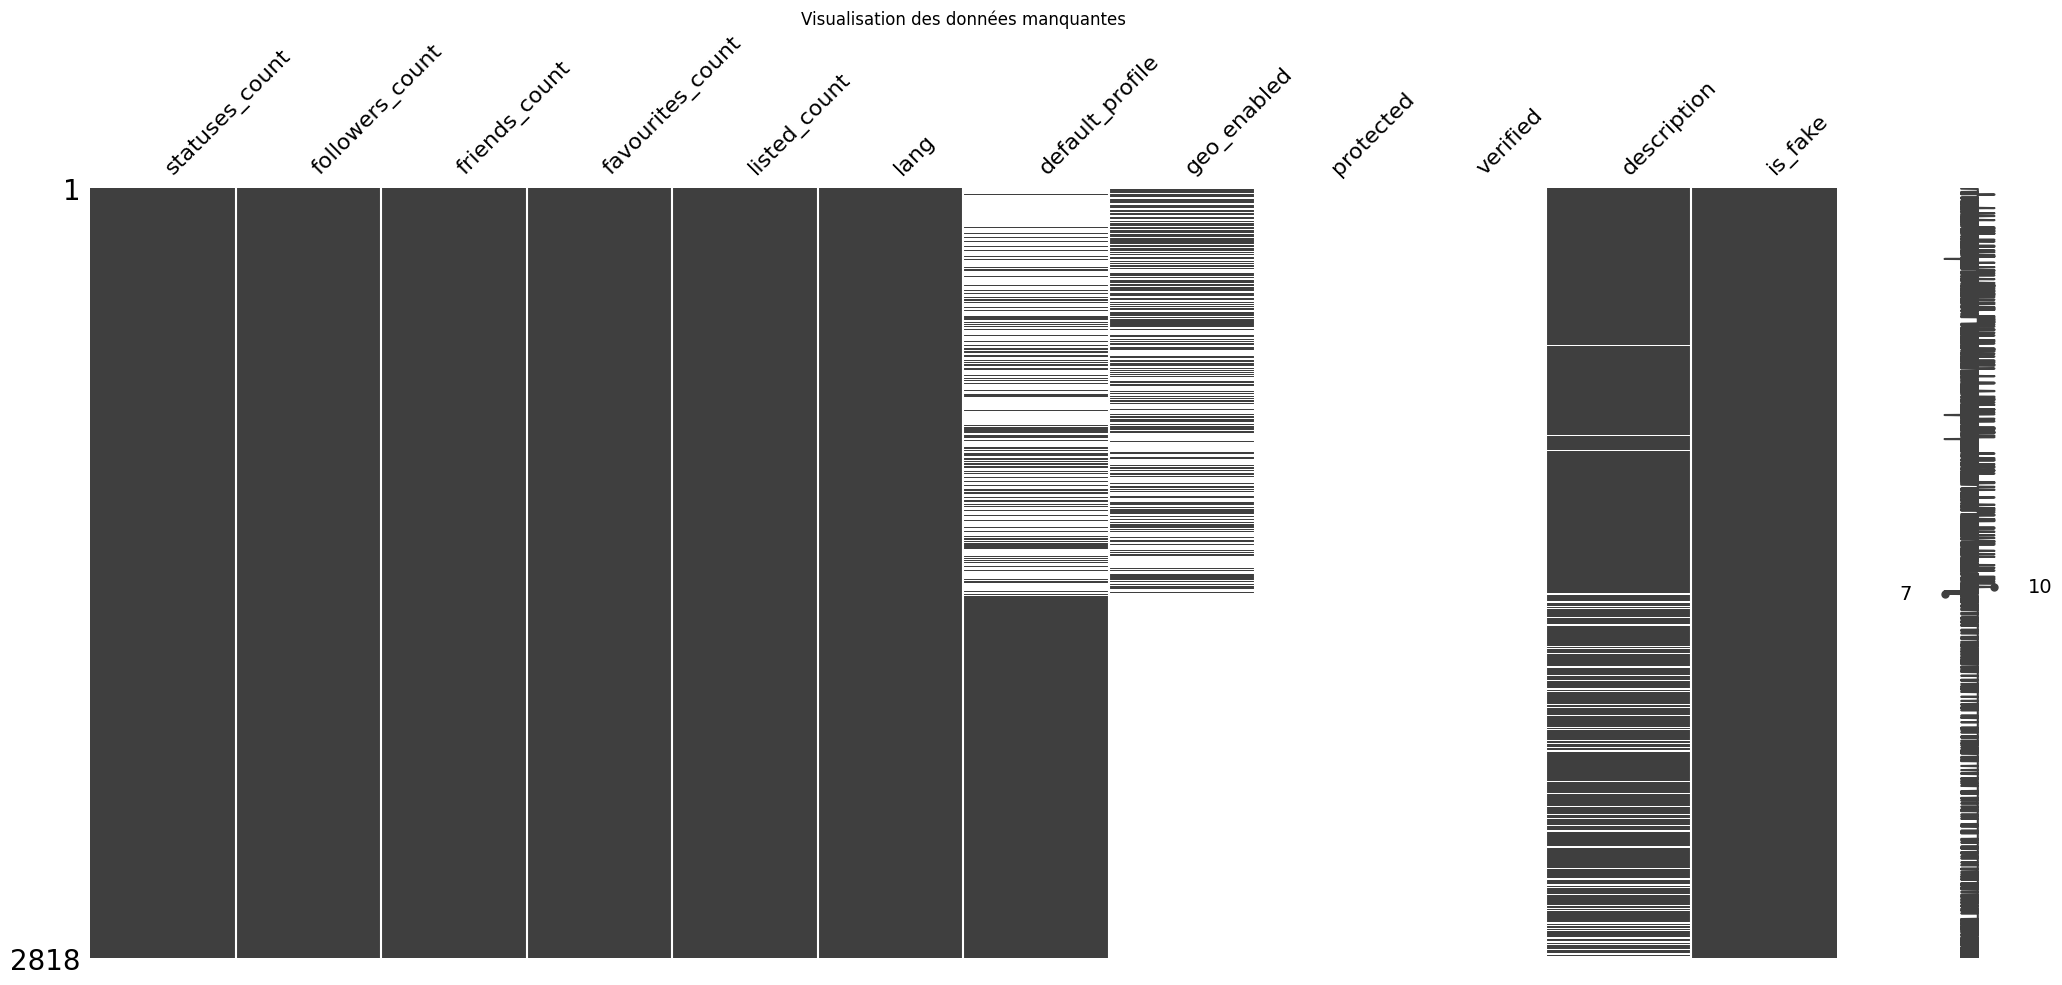

In [9]:
import missingno as msno
plt.figure(figsize=(6, 3))
msno.matrix(data)
plt.title('Visualisation des données manquantes')
plt.show()

In [10]:
data['default_profile'] = data['default_profile'].fillna(0) 

In [11]:
data['geo_enabled'] = data['geo_enabled'].fillna(0)

In [12]:
data = data.drop(columns=['verified', 'protected'])

<Figure size 600x300 with 0 Axes>

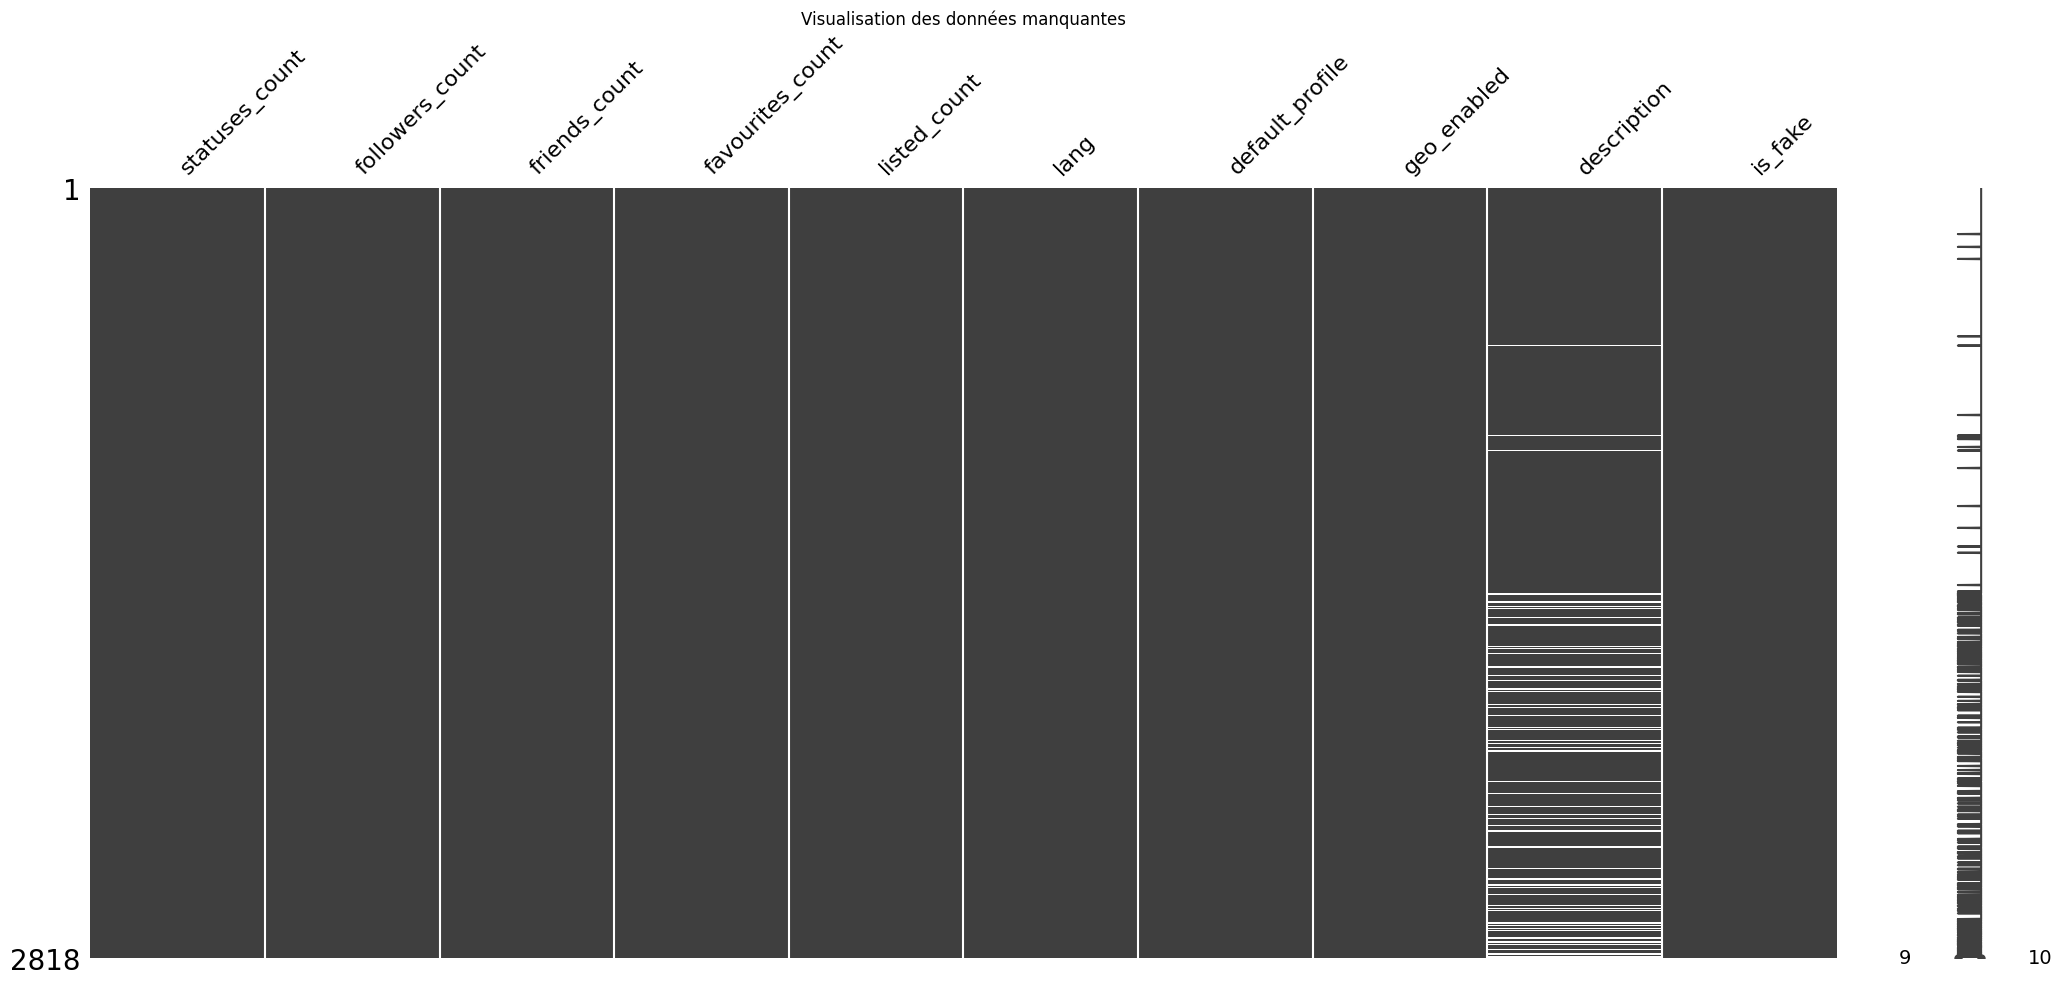

In [13]:
import missingno as msno
plt.figure(figsize=(6, 3))
msno.matrix(data)
plt.title('Visualisation des données manquantes')
plt.show()

In [14]:
data = data.dropna(subset=['description'])

In [15]:
blank_percentage = data['description'].isna().mean() * 100
non_blank_percentage = 100 - blank_percentage
fig = px.pie(
    names=['Blank', 'Non-Blank'],
    values=[blank_percentage, non_blank_percentage],
    title='Percentage of Blank Cells in Description'
)
fig.show()

In [16]:
lang_counts = data['lang'].value_counts().reset_index()
lang_counts.columns = ['Language', 'Count']
fig5 = px.bar(lang_counts, x='Language', y='Count', 
              title='Distribution of Languages', labels={'Language': 'Language', 'Count': 'Count'})
fig5.show()

In [17]:
import plotly.graph_objects as go

# Create box plots for each metric
fig_combined = go.Figure()

fig_combined.add_trace(go.Box(
    y=data['followers_count'],
    x=data['is_fake'],
    name='Followers Count',
    marker_color='blue'
))

fig_combined.add_trace(go.Box(
    y=data['friends_count'],
    x=data['is_fake'],
    name='Friends Count',
    marker_color='green'
))

fig_combined.add_trace(go.Box(
    y=data['statuses_count'],
    x=data['is_fake'],
    name='Statuses Count',
    marker_color='purple'
))

# Update layout
fig_combined.update_layout(
    title='Distribution of Followers, Friends, and Statuses Count by Fake/Real Users',
    xaxis_title='Is Fake',
    yaxis_title='Count',
    boxmode='group'
)

fig_combined.show()

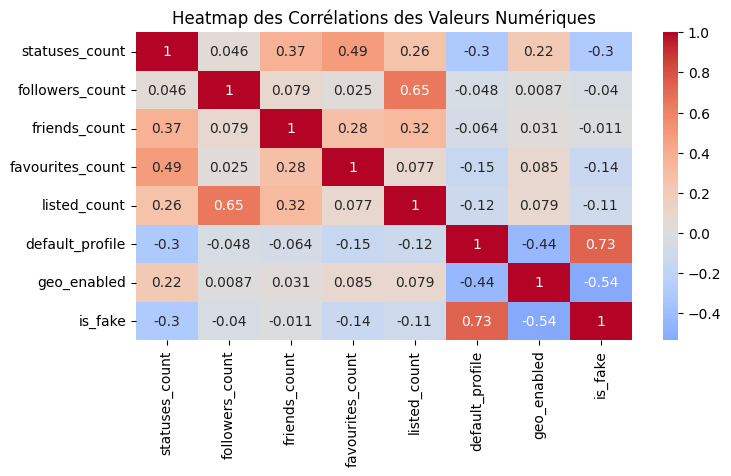

In [18]:
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap des Corrélations des Valeurs Numériques')
plt.show()

In [19]:
from sklearn.utils import shuffle

def insert_random_words(text, n_inserts=2):
    words = text.split()
    word_list = list(wordnet.words())
    for _ in range(n_inserts):
        random_word = random.choice(word_list)
        insert_position = random.randint(0, len(words))
        words.insert(insert_position, random_word)
    return ' '.join(words)

# Calculate the difference in counts between real and fake users
real_count = data[data['is_fake'] == 0].shape[0]
fake_count = data[data['is_fake'] == 1].shape[0]
difference = abs(real_count - fake_count)

# Augment the descriptions of the minority class
if real_count > fake_count:
    minority_class = data[data['is_fake'] == 1]
else:
    minority_class = data[data['is_fake'] == 0]

augmented_rows = []
for i in range(difference):
    row = minority_class.sample(n=1).iloc[0]
    row['description'] = row['description'] if pd.notna(row['description']) else ''
    row['description_aug'] = insert_random_words(row['description'], n_inserts=2)
    augmented_rows.append(row)

# Create a new dataframe with the augmented rows
augmented_df = pd.DataFrame(augmented_rows)
augmented_df

# Concatenate the original dataframe with the augmented dataframe
balanced_data = pd.concat([data, augmented_df.drop(columns=['description_aug'])], ignore_index=True)

balanced_data = shuffle(balanced_data)


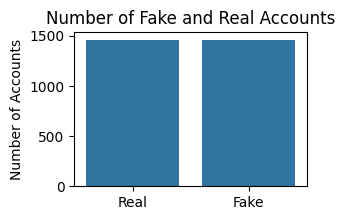

In [20]:
account_counts = balanced_data['is_fake'].value_counts()

plt.figure(figsize=(3, 2))
sns.barplot(x=["Real","Fake"], y=account_counts.values)
plt.ylabel('Number of Accounts')
plt.title('Number of Fake and Real Accounts')
plt.show()

<Figure size 600x300 with 0 Axes>

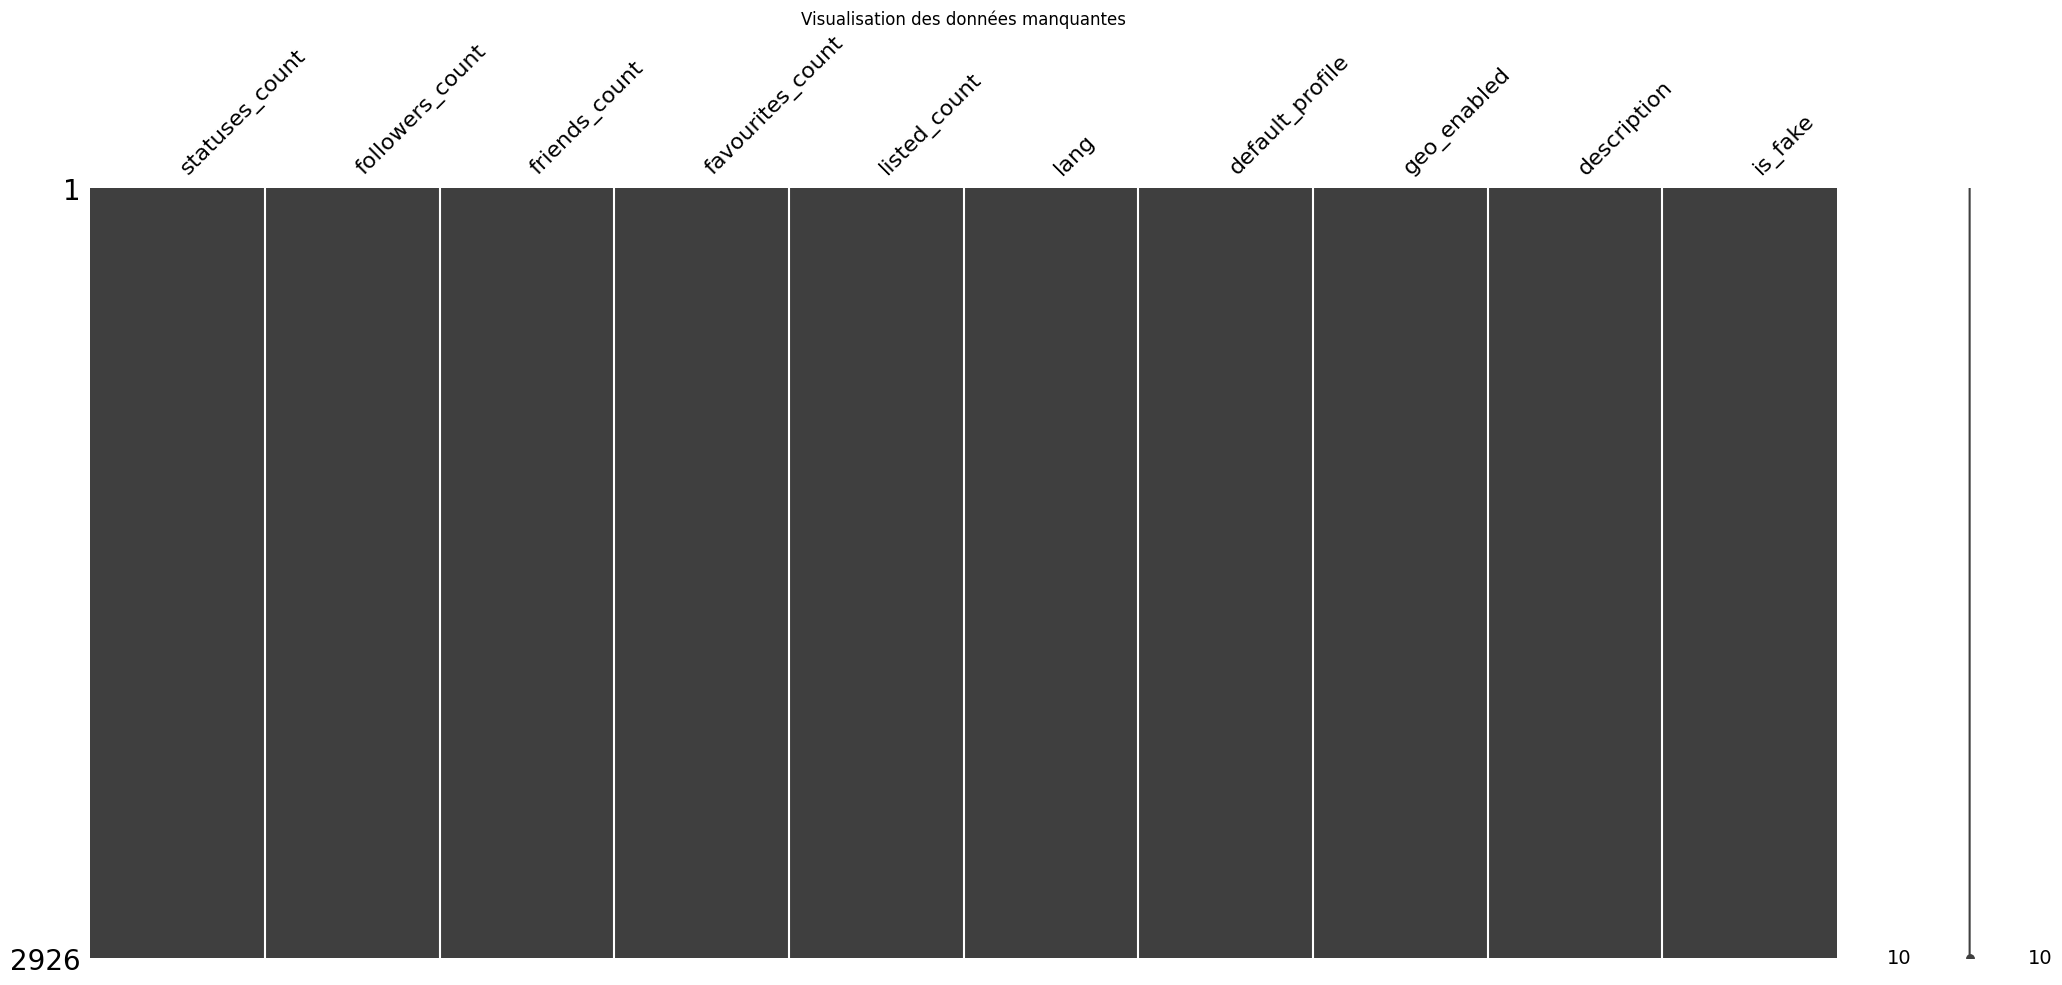

In [21]:
import missingno as msno
plt.figure(figsize=(6, 3))
msno.matrix(balanced_data)
plt.title('Visualisation des données manquantes')
plt.show()

In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Télécharger les ressources nécessaires
nltk.download('stopwords')
nltk.download('punkt')

# Initialiser les stopwords et les stemmers pour les langues supportées
stop_words = {
    'en': set(stopwords.words('english')),
    'it': set(stopwords.words('italian')),
    'es': set(stopwords.words('spanish'))
}

stemmers = {
    'en': SnowballStemmer('english'),
    'it': SnowballStemmer('italian'),
    'es': SnowballStemmer('spanish')
}

# Fonction de prétraitement pour chaque document
def normalize_document(doc, lang):
    # Mise en minuscules et suppression des caractères spéciaux (garde uniquement les lettres)
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, flags=re.I | re.A)
    doc = doc.lower().strip()
    
    # Tokenisation
    tokens = word_tokenize(doc)
    
    # Filtrer les stopwords en fonction de la langue
    tokens = [token for token in tokens if token not in stop_words.get(lang, set())]
    
    # Appliquer le stemming en fonction de la langue
    stemmer = stemmers.get(lang, SnowballStemmer('english'))
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Recréer le document à partir des tokens
    doc = ' '.join(tokens)
    return doc

# Appliquer le prétraitement à la colonne 'description' en utilisant la langue spécifiée
balanced_data['processed_description'] = balanced_data.apply(lambda row: normalize_document(row['description'], row['lang']), axis=1)

# Afficher les descriptions prétraitées
balanced_data[['description', 'processed_description']]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,description,processed_description
2381,http://t.co/pqm8yWac is your one stop shop fr ...,httptcopqmywac one stop shop fr quarri mine re...
1664,Nubian blogger providing information that is u...,nubian blogger provid inform uplift peopl fric...
2452,"Dear Isis (eye-si) is the hottest, new site wh...",dear isi eyesi hottest new site seek advic kin...
1045,"Rapper, singer / PE MCThe sky's the limit!",rapper singer pe mcthe skys the limit
1143,artista é chi sà fare di una soluzione un enig...,artist s far soluzion enigm karl kraus
...,...,...
2461,"Killing these hoes with kindness:)) Follow me,...",kill hoe kind follow ill follow bak fwm
1622,BG: My Wife ;) -- Fuck E V E R Y B O DY !,bg wife fuck e v e r b dy
111,"Si, sono Nerd. ma non il classico Nerd. un Ner...",nerd classic nerd nerd divers nuov categor ner...
967,Representante de jugadores profesionales de ba...,represent jugador profesional baloncest fundad...


In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# One-hot encode categorical features like 'lang' and 'default_profile'
encoder = OneHotEncoder(sparse=False)
X_cat = encoder.fit_transform(balanced_data[['lang', 'default_profile', 'geo_enabled']])

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [26]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(balanced_data['description']).toarray()

In [27]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(balanced_data[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']])

# Concatenate all features
X = np.hstack((X_tfidf, X_num_scaled, X_cat))
y = balanced_data['is_fake']

In [28]:
X

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print("Model Accuracy:", clf.score(X_test, y_test))

Model Accuracy: 1.0


In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
Logistic Regression Accuracy: 1.00


c:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


K-Nearest Neighbors Accuracy: 1.00
Support Vector Machine Accuracy: 1.00
Decision Tree Accuracy: 1.00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data before applying NLP techniques, encoding, and normalization
X_train, X_test, y_train, y_test = train_test_split(balanced_data, balanced_data['is_fake'], test_size=0.2, random_state=42, stratify=balanced_data['is_fake'])

# Apply the preprocessing steps to the training data
# One-hot encode categorical features like 'lang' and 'default_profile'
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[['lang', 'default_profile', 'geo_enabled']])
X_test_cat = encoder.transform(X_test[['lang', 'default_profile', 'geo_enabled']])

# Apply TF-IDF vectorization to the 'description' column
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train['description']).toarray()
X_test_tfidf = tfidf.transform(X_test['description']).toarray()

# Normalize numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']])
X_test_num_scaled = scaler.transform(X_test[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']])

# Concatenate all features
X_train_preprocessed = np.hstack((X_train_tfidf, X_train_num_scaled, X_train_cat))
X_test_preprocessed = np.hstack((X_test_tfidf, X_test_num_scaled, X_test_cat))

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train_preprocessed, y_train)

# Evaluate the model
print("Model Accuracy:", clf.score(X_test_preprocessed, y_test))

c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Model Accuracy: 0.9948805460750854
